# Churn Prediction Model

In [2]:
import pandas as pd
import numpy as np
pd.options.mode.copy_on_write = True

### Loading dataset

In [3]:
df = pd.read_csv("churn.csv", sep=",")

In [4]:
df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [5]:
churn_df = df[['account_length', 'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge', 'number_customer_service_calls', 'churned']]
churn_df.head()

,account_length,total_day_charge,total_eve_charge,total_night_charge,total_intl_charge,number_customer_service_calls,churned
0,128,45.07,16.78,11.01,2.70,1,False.
1,107,27.47,16.62,11.45,3.70,1,False.
2,137,41.38,10.30,7.32,3.29,0,False.
3,84,50.90,5.26,8.86,1.78,2,False.
4,75,28.34,12.61,8.41,2.73,3,False.


In [6]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 5000 non-null   int64  
 1   total_day_charge               5000 non-null   float64
 2   total_eve_charge               5000 non-null   float64
 3   total_night_charge             5000 non-null   float64
 4   total_intl_charge              5000 non-null   float64
 5   number_customer_service_calls  5000 non-null   int64  
 6   churned                        5000 non-null   object 
dtypes: float64(4), int64(2), object(1)
memory usage: 273.6+ KB


Churn is a string currently.

In [7]:
churn_df["churned"] = np.where(churn_df["churned"] == " True.", 1, 0) 

In [8]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 5000 non-null   int64  
 1   total_day_charge               5000 non-null   float64
 2   total_eve_charge               5000 non-null   float64
 3   total_night_charge             5000 non-null   float64
 4   total_intl_charge              5000 non-null   float64
 5   number_customer_service_calls  5000 non-null   int64  
 6   churned                        5000 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 273.6 KB


array([[<Axes: title={'center': 'account_length'}>,
        <Axes: title={'center': 'total_day_charge'}>,
        <Axes: title={'center': 'total_eve_charge'}>],
       [<Axes: title={'center': 'total_night_charge'}>,
        <Axes: title={'center': 'total_intl_charge'}>,
        <Axes: title={'center': 'number_customer_service_calls'}>],
       [<Axes: title={'center': 'churned'}>, <Axes: >, <Axes: >]],
      dtype=object)

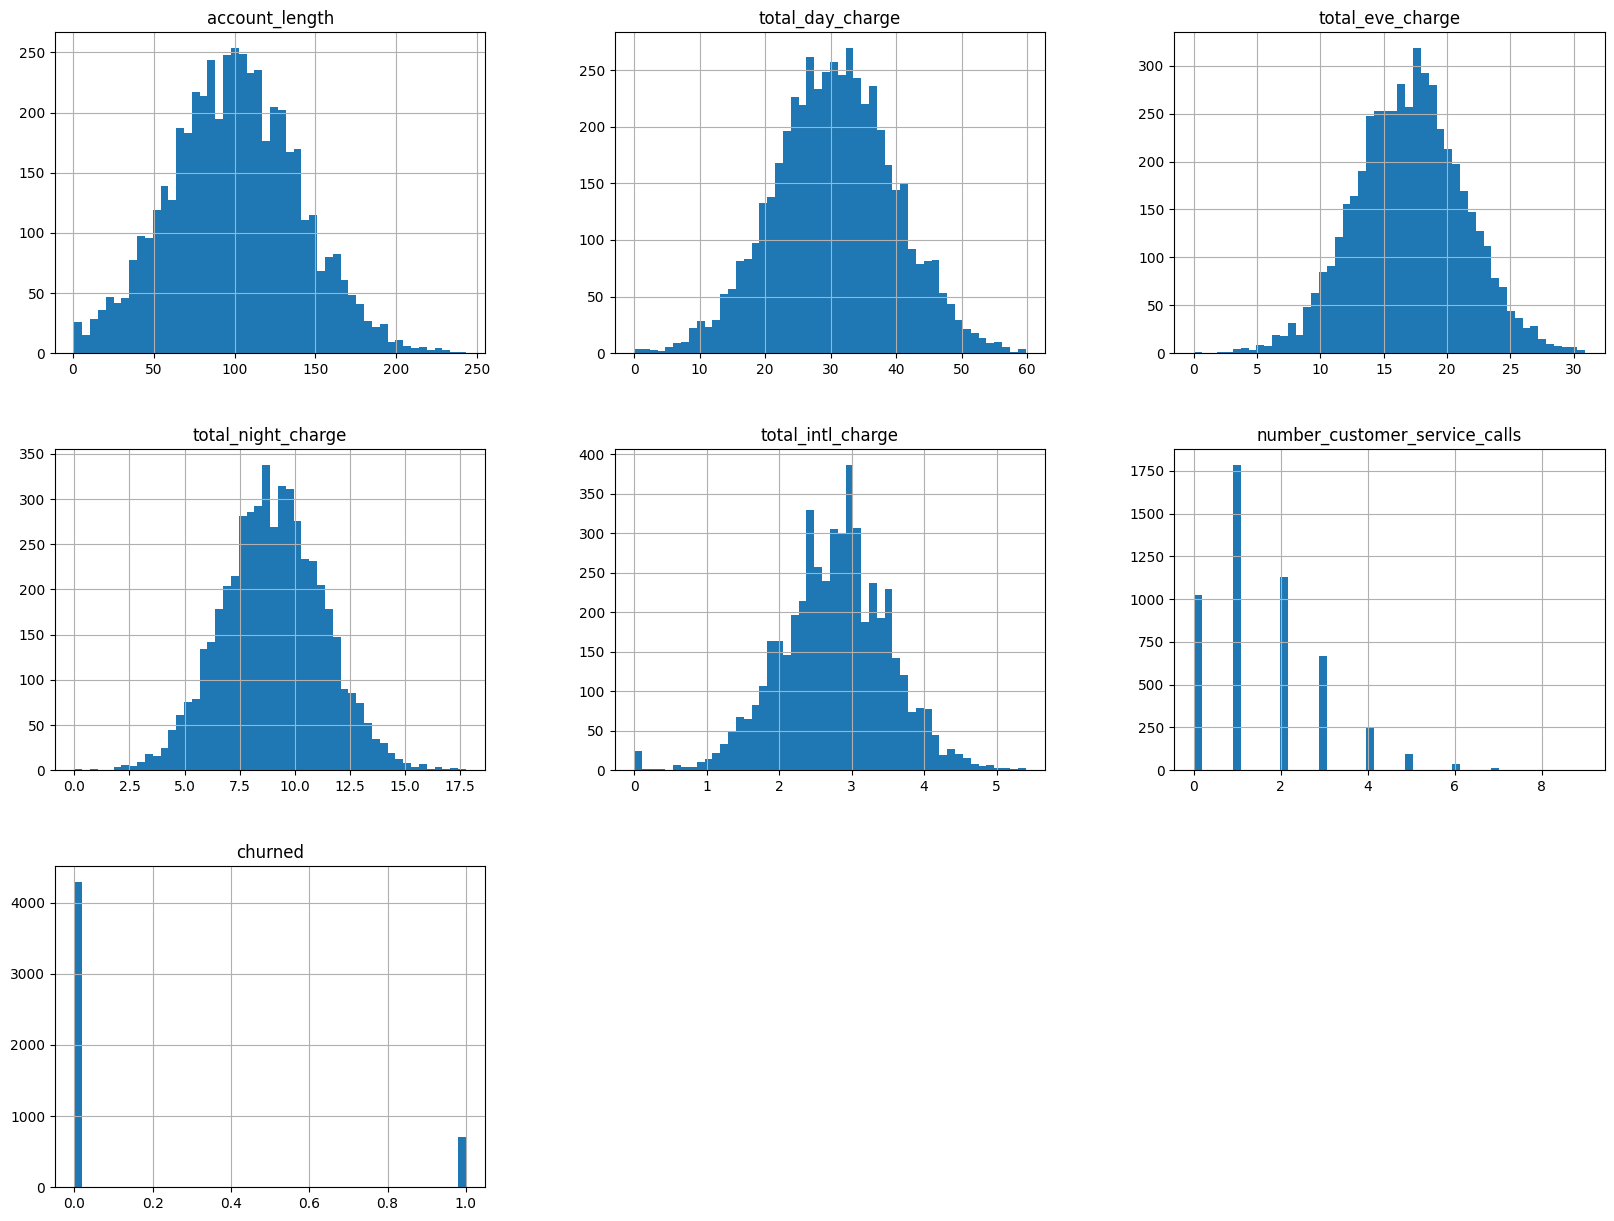

In [9]:
churn_df.hist(bins=50, figsize=(20,15))

Proportion of the target variable:

In [10]:
sum(churn_df["churned"] == 1)/churn_df.shape[0]

0.1414

Only 14% of the data is of class 1, which means churned. This proves the data is imbalanced.

### Data preprocessing

Given the only columns used will be account_length and number:customer_service_calls, I will only preprocess them.

Remove outliers in account_length:

In [11]:
print(max(churn_df["account_length"]))

q3 = np.quantile(churn_df["account_length"], 0.75)
q1 = np.quantile(churn_df["account_length"], 0.25)
iqr = q3 - q1

lower_range = q1 - 1.5 * iqr
upper_range = q3 + 1.5 * iqr

churn_df = churn_df[(churn_df["account_length"] <= upper_range) & (churn_df["account_length"] >= lower_range)]
print(max(churn_df["account_length"]))
print(max(churn_df["account_length"]) <= upper_range)
print(churn_df["account_length"])

243
208
True
0       128
1       107
2       137
3        84
4        75
       ... 
4995     50
4996    152
4997     61
4998    109
4999     86
Name: account_length, Length: 4976, dtype: int64


Standarize the continuous column, account_length: 

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

churn_df["account_length"] = scaler.fit_transform(churn_df[["account_length"]])

print(churn_df["account_length"])

0       0.728274
1       0.188274
2       0.959703
3      -0.403156
4      -0.634584
          ...   
4995   -1.277442
4996    1.345418
4997   -0.994585
4998    0.239702
4999   -0.351727
Name: account_length, Length: 4976, dtype: float64


### K-NN

Fitting

In [13]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 

y = churn_df["churned"]
X = churn_df[["account_length", "number_customer_service_calls"]]

missing_rows = X[X.isna().any(axis=1)]

# Print the rows with missing values
print(missing_rows)

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X,y)

Empty DataFrame
Columns: [account_length, number_customer_service_calls]
Index: []


KNeighborsClassifier(n_neighbors=6)

Predicting

In [14]:
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

# NOTE: In a real case X_new should be preprocessed the same way X was. Since it wasnt, the predictions might be worse

y_pred = knn.predict(X_new)

# Print the predictions
print("Predictions: {}".format(y_pred)) 

Predictions: [1 0 0]


/home/barbara/MDS/IDS/ICD/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Train-test split

In [15]:
# Import the module
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

X = churn_df.drop("churned", axis=1)
y = churn_df["churned"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


print("Accuracy:")   # Not very usefull since we have an imbalanced dataset
print(knn.score(X_test, y_test)) 
# or:
# print(accuracy_score(y_test, y_pred))

# Since False Positives wouldn't be a problem for this kind of situation, whereas False Negatives would (miss clients), recall is more important than precision.

print("Recall:")
print(recall_score(y_test, y_pred))

print("Precision:")
print(precision_score(y_test, y_pred))

print("F1 Score:")  
print(f1_score(y_test, y_pred))


Accuracy:
0.8965863453815262
Recall:
0.45390070921985815
Precision:
0.7111111111111111
F1 Score:
0.5541125541125541


### Overfitting and underfitting (find best k for k-NN)

In [18]:
# Create neighbors
num_neighbors = np.arange(1, 12)
train_accuracies = {}
test_accuracies = {}

for num in num_neighbors:
    # Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=num)
  
    # Fit the model
    knn.fit(X_train, y_train)
  
    # Compute accuracy
    train_accuracies[num] = knn.score(X_train, y_train)
    test_accuracies[num] = knn.score(X_test, y_test)

print(num_neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11] 
 {np.int64(1): 1.0, np.int64(2): 0.9251256281407035, np.int64(3): 0.9281407035175879, np.int64(4): 0.9108040201005025, np.int64(5): 0.9175879396984925, np.int64(6): 0.9090452261306533, np.int64(7): 0.9130653266331659, np.int64(8): 0.90678391959799, np.int64(9): 0.9105527638190954, np.int64(10): 0.9060301507537688, np.int64(11): 0.90678391959799} 
 {np.int64(1): 0.8493975903614458, np.int64(2): 0.8855421686746988, np.int64(3): 0.8955823293172691, np.int64(4): 0.893574297188755, np.int64(5): 0.8965863453815262, np.int64(6): 0.891566265060241, np.int64(7): 0.8955823293172691, np.int64(8): 0.8905622489959839, np.int64(9): 0.8965863453815262, np.int64(10): 0.892570281124498, np.int64(11): 0.8945783132530121}


By the values we can see a higher number of neighbours helps to combat overfitting (high accuracy on train data while low accuracy on test data)

### Visualizing model complexity

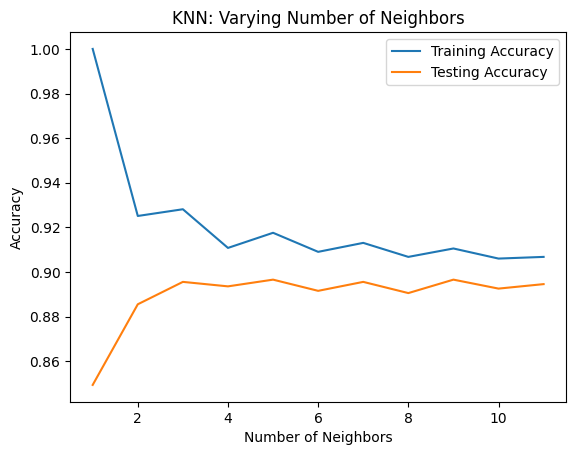

In [20]:
import matplotlib.pyplot as plt

# Add a title
plt.title("KNN: Varying Number of Neighbors")
# Plot training accuracies
plt.plot(num_neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(num_neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

plt.show()

### Repeat with Naïve Bayes Algorithm

In [22]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print("Accuracy:")   
print(nb.score(X_test, y_test)) 

print("Recall:")
print(recall_score(y_test, y_pred))

print("Precision:")
print(precision_score(y_test, y_pred))

print("F1 Score:")  
print(f1_score(y_test, y_pred))

Accuracy:
0.8704819277108434
Recall:
0.2198581560283688
Precision:
0.62
F1 Score:
0.32460732984293195
